## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study["Mouse ID"].unique())
mouse_unique = pd.DataFrame({"Total Mice": [mouse_count]})
mouse_unique

,Total Mice
0,249


In [3]:
mouse_study.shape

(1893, 8)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all = mouse_study.loc[mouse_study["Mouse ID"]=="g989"]
duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  
clean_df =  mouse_study.loc[mouse_study["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice in the clean DataFrame.

mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count = pd.DataFrame({"Updated Mice": [mouse_count]})
mouse_count

,Updated Mice
0,248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen = clean_df.groupby(["Drug Regimen"])


mean_regimen = drug_regimen["Tumor Volume (mm3)"].mean()
median_regimen = drug_regimen["Tumor Volume (mm3)"].median()
variance_regimen = drug_regimen["Tumor Volume (mm3)"].var()
sd_regimen = drug_regimen["Tumor Volume (mm3)"].std()
sem_regimen = drug_regimen["Tumor Volume (mm3)"].sem()

summary_drug_regimen = pd.DataFrame({"Mean": mean_regimen, "Median": median_regimen, "Variance": variance_regimen,
                                     "Standard Variance": sd_regimen, "SEM": sem_regimen})

summary_drug_regimen



,Mean,Median,Variance,Standard Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_stats = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
summ_stats.head(10)



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

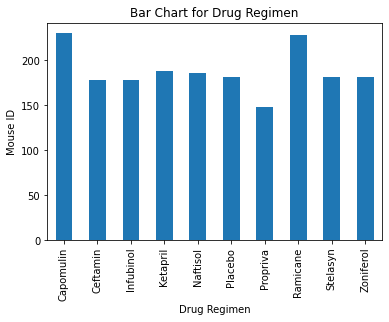

In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

total_mice = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
total_mice.plot(kind="bar")

plt.title("Bar Chart for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID")
plt.show()

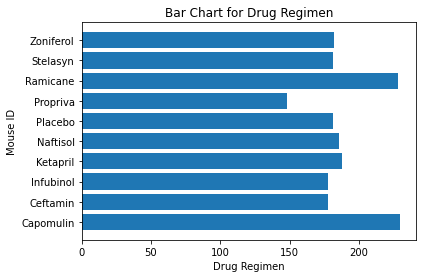

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
    
plt.barh(total_mice.index, total_mice)


plt.title("Bar Chart for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID")
plt.show()
    

Text(0.5, 1.0, 'Gender Distribution')

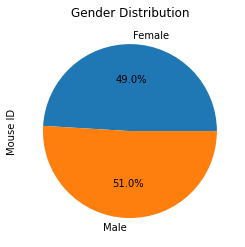

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dis = clean_df.groupby("Sex")["Mouse ID"].count()
gender_dis.plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution")

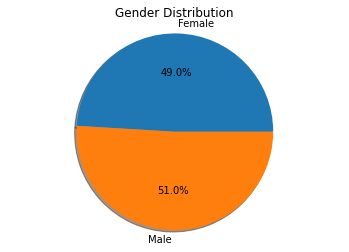

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# plt.pie(gender_dis,autopct="%1.1f%%")
# plt.show

gender = ["Female", "Male"]
counts = [922, 958]
plt.pie(gender_dis, labels=gender, autopct="%1.1f%%", shadow=True)

plt.title("Gender Distribution")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ['Capomulin',"Ramicane", "Infubinol", "Ceftamin"]
#create a dataframe having all drugs in drug list
drug_reg_df = clean_df.loc[clean_df["Drug Regimen"].isin(drug_list)]
drug_reg_df
# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = drug_reg_df.groupby("Mouse ID")["Timepoint"].max()
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timedrug = pd.merge(timepoint_df, drug_reg_df, on = ["Mouse ID", "Timepoint"])
merge_timedrug
                          

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin',"Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
      # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_df = merge_timedrug.loc[merge_timedrug["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
      # add subset 
    tumor_vol.append(tumor_vol_df)
    
  
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_df.quantile([.25, .5, .75])
    lowquart = quartiles[0.25]
    uppquart = quartiles[0.75]
    interquart= uppquart-lowquart
    lowerbound = lowquart-(1.5*interquart)
    upperbound = uppquart+(1.5*interquart)
    outliers = tumor_vol_df.loc[(tumor_vol_df< lowerbound)|(tumor_vol_df>upperbound)]
    print(f'Drug is{drug}: outliers {outliers}')

Drug isCapomulin: outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug isRamicane: outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug isInfubinol: outliers 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug isCeftamin: outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


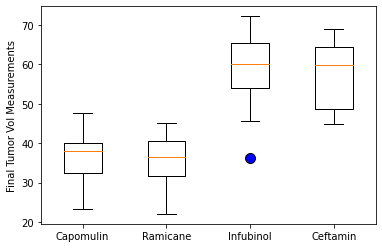

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_out = dict(markerfacecolor="blue", markersize=10)
plt.boxplot(tumor_vol,labels = drug_list, flierprops=red_out)
plt.ylabel('Final Tumor Vol Measurements');


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

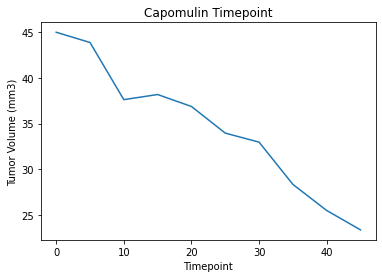

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

mousedata = capomulin.loc[capomulin["Mouse ID"] == "s185"]

plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])

plt.title("Capomulin Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

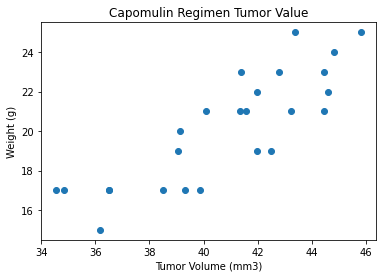

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouseid_group = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

merge_cap = pd.merge(mouse_metadata, mouseid_group, on = "Mouse ID")

plt.scatter(merge_cap["Tumor Volume (mm3)"], merge_cap ["Weight (g)"])

plt.title("Capomulin Regimen Tumor Value")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

plt.show

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coeff = st.pearsonr(merge_cap["Tumor Volume (mm3)"], merge_cap ["Weight (g)"])
print(f"correlation is : {corr_coeff[0]}")

correlation is : 0.8419363424694717


The r square is 0.7088568047708721


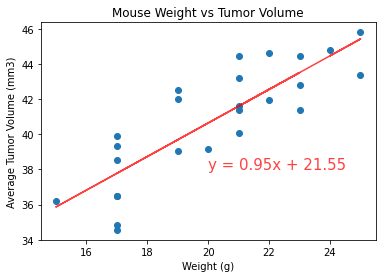

In [20]:
x_values = merge_cap["Weight (g)"]
y_values = merge_cap["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r square is {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(20,38),fontsize=15, color="red", alpha=0.75)
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()